In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Netflix_Userbase_Dataset.csv")

In [7]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [9]:
df.describe

<bound method NDFrame.describe of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

     

In [11]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [15]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [17]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [21]:
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [31]:
Average_revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].mean()

In [33]:
print(Average_revenue_by_subscription)

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64


In [35]:
User_count_by_Country = df.groupby('Country')['User ID'].count()

In [37]:
print(User_count_by_Country)

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64


In [39]:
Median_age_by_plan_duration = df.groupby('Plan Duration')['Age'].median()

In [41]:
print(Median_age_by_plan_duration)

Plan Duration
1 Month    39.0
Name: Age, dtype: float64


In [43]:
Total_revenue_by_gender = df.groupby('Gender')['Monthly Revenue'].sum()

In [45]:
print(Total_revenue_by_gender)

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64


In [47]:
Average_age_by_device = df.groupby('Device')['Age'].mean()

In [49]:
print(Average_age_by_device)

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64


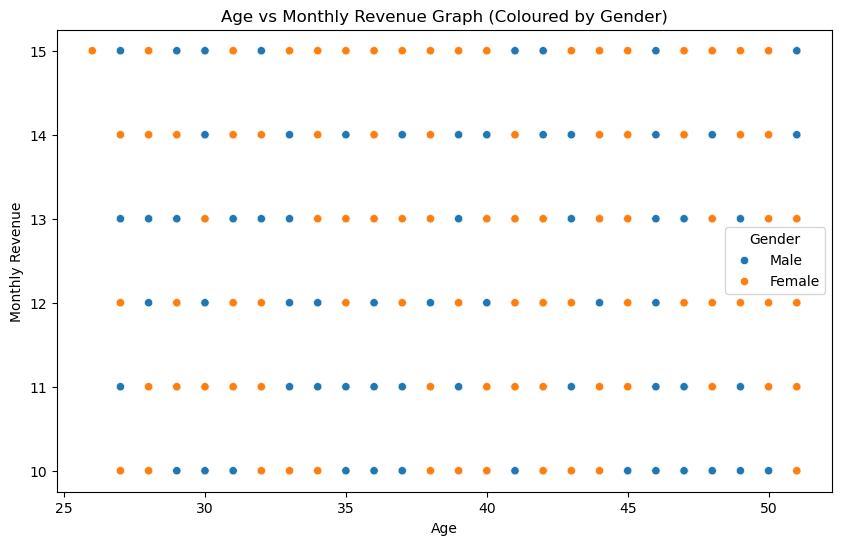

In [53]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "Age", y = "Monthly Revenue", hue = "Gender", data = df)
plt.title("Age vs Monthly Revenue Graph (Coloured by Gender)")
plt.xlabel("Age")
plt.ylabel("Monthly Revenue")
plt.show()

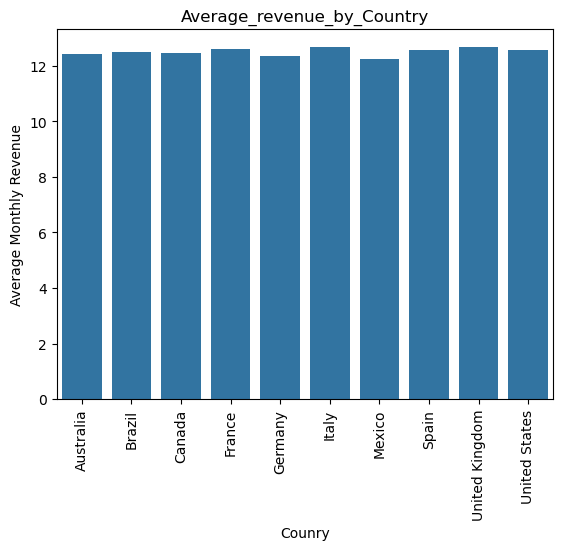

In [61]:
Average_revenue_by_Country = df.groupby('Country')['Monthly Revenue'].mean().reset_index()
sns.barplot(x = 'Country', y = 'Monthly Revenue', data = Average_revenue_by_Country)
plt.title("Average_revenue_by_Country")
plt.xlabel("Counry")
plt.ylabel("Average Monthly Revenue")
plt.xticks(rotation = 90)
plt.show()

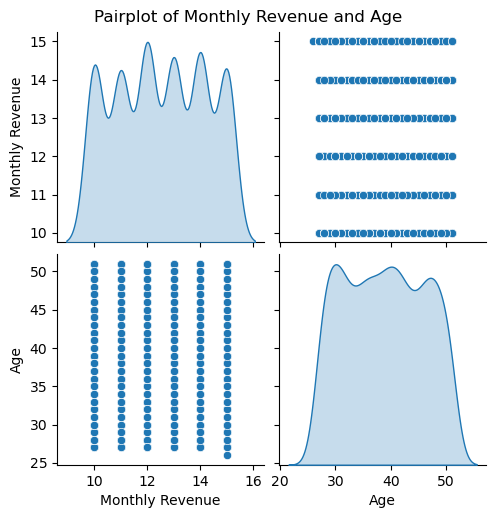

In [65]:
numerical_cloumns = ['Monthly Revenue', 'Age']
sns.pairplot(df[numerical_cloumns], diag_kind = "kde")
plt.suptitle("Pairplot of Monthly Revenue and Age", y = 1.02)
plt.show()

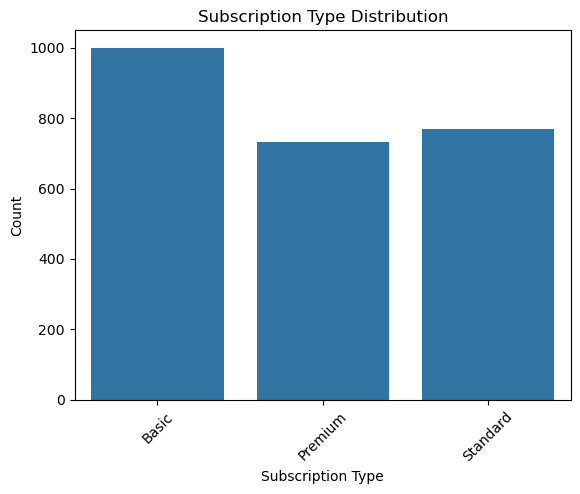

In [73]:
sns.countplot(x = 'Subscription Type', data = df)
plt.title("Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

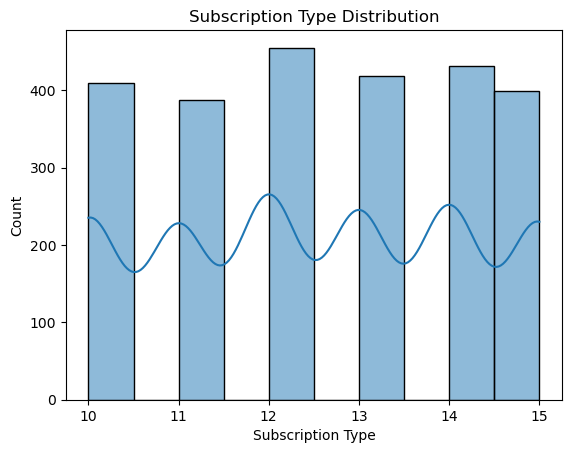

In [75]:
sns.histplot(df['Monthly Revenue'], bins = 10, kde = True)
plt.title("Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.show()

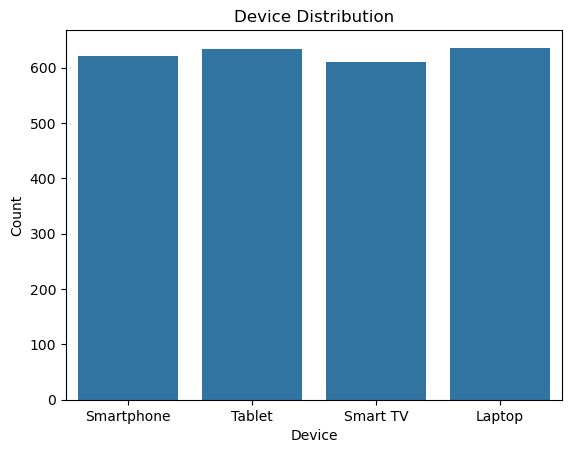

In [77]:
sns.countplot(x = 'Device', data = df)
plt.title("Device Distribution")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

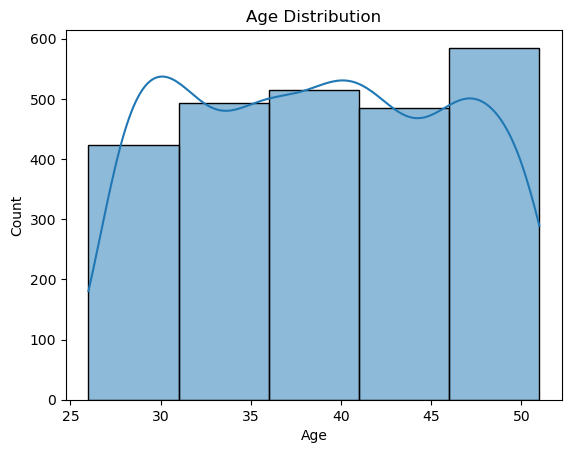

In [81]:
sns.histplot(df['Age'], bins = 5, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()